# Face Landmark Detection

(Copied from [this code on Kaggle](https://www.kaggle.com/code/ishaan34/face-landmark-detection))

In [ ]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_image_landmarks(img_array, df_landmarks, index):
    plt.imshow(img_array[index, :, :, 0], cmap = 'gray')
    plt.scatter(df_landmarks.iloc[index][0: -1: 2], df_landmarks.iloc[index][1: : 2], c = 'y')
    plt.show()

In [ ]:
images = np.load("face_images.npz")
images = images.get(images.files[0]) # images
images = np.moveaxis(images, -1, 0)
images = images.reshape(images.shape[0], images.shape[1], images.shape[1], 1)

<frozen _collections_abc>:807: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.


In [16]:
keypoints = pd.read_csv("facial_keypoints.csv")
print(len(keypoints))
keypoints.head()

7049


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [6]:
keypoints = keypoints.fillna(0)

In [ ]:
new_features = images[keypoints.index.values, :, :, :] #Nums of rows,w, H, Channels
new_features = new_features / 255
keypoints.reset_index(inplace = True, drop = True)

In [8]:
keypoints.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


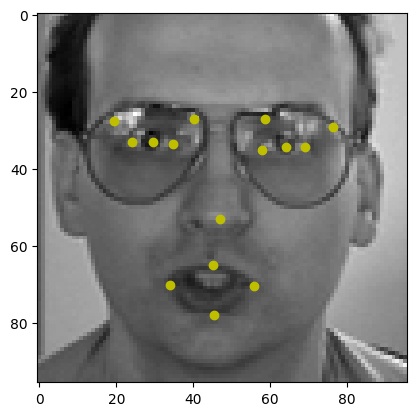

In [15]:
plot_image_landmarks(new_features, keypoints, 6)

In [ ]:


# Create the images directory using pathlib
images_dir = Path("images")
images_dir.mkdir(exist_ok=True)

# Get the total number of images
total_images = new_features.shape[0]

# Define the batch size
batch_size = 1000

# Calculate the number of batches needed
num_batches = (total_images + batch_size - 1) // batch_size  # Ceiling division

# Divide and save the images in batches
for i in range(num_batches):
    # Calculate the start and end indices for this batch
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, total_images)

    # Get the batch of images
    batch_images = new_features[start_idx:end_idx]

    # Save the batch to a .npz file
    output_file = images_dir / f"face_images_batch_{i+1}.npz"
    np.savez(output_file, images=batch_images)

    print(f"Saved batch {i+1}/{num_batches} with {end_idx - start_idx} images")

print(f"All images have been saved in {num_batches} batches in the '{images_dir}' directory")

Saved batch 1/8 with 1000 images
Saved batch 2/8 with 1000 images
Saved batch 3/8 with 1000 images
Saved batch 4/8 with 1000 images
Saved batch 5/8 with 1000 images
Saved batch 6/8 with 1000 images
Saved batch 7/8 with 1000 images
Saved batch 8/8 with 49 images
All images have been saved in 8 batches in the 'images' directory
